<h1>Case Study: How Does a Bike-Share Navigate Speedy Success?<h1>

<h2>Business Task - Ask <h2>
<h5>1. How do annual members and casual riders use Cyclistic bikes differently?</h5>
<h5>2. Why would casual riders buy Cyclistic annual memberships?</h5>
<h5>3. How can Cyclistic use digital media to influence casual riders to become members?</h5>

<h1>Prepare<h1>

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [61]:
df = pd.read_csv("D:/omg/Project/Bike pj/Data/csv/all/bikeshare.csv")

In [62]:
case_1=df
case_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5823559 entries, 0 to 5823558
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 577.6+ MB


In [63]:
case_1['started_at'].head()

0    2021-08-06 16:43:01
1    2021-08-20 22:15:26
2    2021-08-17 19:30:18
3    2021-08-08 12:25:38
4    2021-08-28 17:12:28
Name: started_at, dtype: object

In [64]:
key = case_1["start_station_name"].isnull()
df_NA = case_1.loc[key]
df_NA

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
1344,86540D280FBBCCD0,electric_bike,2021-08-12 09:31:13,2021-08-12 09:39:04,NaN,NaN,NaN,NaN,41.93,-87.70,41.930000,-87.720000,member
1345,75784D0C49862E27,electric_bike,2021-08-12 04:22:33,2021-08-12 04:33:04,NaN,NaN,NaN,NaN,41.93,-87.72,41.940000,-87.700000,member
1346,A3DA6E3FE1C5F7EE,electric_bike,2021-08-12 11:56:58,2021-08-12 12:04:56,NaN,NaN,NaN,NaN,41.85,-87.69,41.870000,-87.690000,member
1347,C691D7F342C68DC7,electric_bike,2021-08-14 08:27:17,2021-08-14 09:36:25,NaN,NaN,NaN,NaN,41.92,-87.72,41.930000,-87.720000,member
1348,AE1F8E04BFAA4679,electric_bike,2021-08-18 11:12:57,2021-08-18 11:18:06,NaN,NaN,NaN,NaN,41.93,-87.77,41.930000,-87.760000,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5823554,8BE00C2F370D1D6D,electric_bike,2021-12-16 17:26:59,2021-12-16 17:59:56,NaN,NaN,St. Clair St & Erie St,13016,41.90,-87.69,41.894345,-87.622798,member
5823555,76B025B169CF0B3F,electric_bike,2021-12-14 08:32:59,2021-12-14 08:43:21,NaN,NaN,St. Clair St & Erie St,13016,41.89,-87.64,41.894345,-87.622798,member
5823556,AE8BC510B940E6D2,electric_bike,2021-12-14 16:28:28,2021-12-14 16:33:22,NaN,NaN,Wolcott (Ravenswood) Ave & Montrose Ave,TA1307000144,41.96,-87.69,41.961406,-87.676169,member
5823557,95F287715B3287AD,electric_bike,2021-12-09 08:10:18,2021-12-09 08:41:44,NaN,NaN,Damen Ave & Walnut (Lake) St,KA17018054,41.96,-87.71,41.886106,-87.676828,member


In [65]:
#convert to datetime
case_1['started_at']= pd.to_datetime(case_1['started_at'])
case_1.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,A5AF35CB4C40C386,electric_bike,2021-08-06 16:43:01,2021-08-06 16:51:21,Bernard St & Elston Ave,18016,Kildare Ave & Montrose Ave,KA1706005015,41.949953,-87.713994,41.961018,-87.735652,casual
1,06A7BEB1B7E25E45,classic_bike,2021-08-20 22:15:26,2021-08-20 22:37:28,Glenwood Ave & Touhy Ave,525,Broadway & Ridge Ave,15578,42.012701,-87.666058,41.984045,-87.660274,member
2,D06866592603F067,classic_bike,2021-08-17 19:30:18,2021-08-17 19:43:55,Glenwood Ave & Touhy Ave,525,Western Ave & Howard St,527,42.012701,-87.666058,42.018901,-87.690048,casual
3,95B45E9C0877BD63,classic_bike,2021-08-08 12:25:38,2021-08-08 12:44:17,Glenwood Ave & Touhy Ave,525,Broadway & Berwyn Ave,13109,42.012701,-87.666058,41.978353,-87.659753,member
4,C36DA61E9C306925,classic_bike,2021-08-28 17:12:28,2021-08-28 17:29:19,Glenwood Ave & Touhy Ave,525,Broadway & Ridge Ave,15578,42.012701,-87.666058,41.984045,-87.660274,member


In [66]:
#finding the weekday
case_1['week_day'] = case_1['started_at'].apply(lambda x:x.weekday())

In [67]:
dict1= {0: 'Sunday', 1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5: 'Friday', 6:'Saturday'}
case_1['week_day']=case_1['week_day'].apply(lambda y: dict1[y])
case_1['week_day'].head()

0    Thursday
1    Thursday
2      Monday
3    Saturday
4      Friday
Name: week_day, dtype: object

In [68]:
#sort values by start time
case_1.sort_values(by=['started_at'], inplace = True, ascending=True)

In [69]:
case_1['ended_at']= pd.to_datetime(case_1['ended_at'])
case_1['ride_length']= (case_1['ended_at'] - case_1['started_at']) / datetime.timedelta(minutes=1)


In [70]:
case_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5823559 entries, 3100833 to 5702762
Data columns (total 15 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
 13  week_day            object        
 14  ride_length         float64       
dtypes: datetime64[ns](2), float64(5), object(8)
memory usage: 710.9+ MB


In [71]:
case_1.drop_duplicates()
case_1.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,week_day,ride_length
3100833,A3F8D895163BBB49,electric_bike,2021-01-01 00:02:05,2021-01-01 00:12:39,NaN,NaN,NaN,NaN,41.980000,-87.650000,41.980000,-87.660000,member,Thursday,10.566667
3317955,0D139A3203274B87,classic_bike,2021-01-01 00:02:24,2021-01-01 00:08:39,State St & 33rd St,13216,MLK Jr Dr & 29th St,TA1307000139,41.834734,-87.625813,41.842052,-87.617000,member,Thursday,6.250000
1635171,C7AE8E9CDB197A8E,classic_bike,2021-01-01 00:06:55,2021-01-01 00:26:36,Lakeview Ave & Fullerton Pkwy,TA1309000019,Ritchie Ct & Banks St,KA1504000134,41.925858,-87.638973,41.906866,-87.626217,member,Thursday,19.683333
1377821,2633EB2B8A99F5CB,electric_bike,2021-01-01 00:12:13,2021-01-01 00:20:06,Kedzie Ave & Milwaukee Ave,13085,NaN,NaN,41.929528,-87.707899,41.920000,-87.720000,member,Thursday,7.883333
1377691,3097EF26414C7016,classic_bike,2021-01-01 00:12:21,2021-01-01 00:12:33,Montrose Harbor,TA1308000012,Montrose Harbor,TA1308000012,41.963982,-87.638181,41.963982,-87.638181,member,Thursday,0.200000


<h1>Analysis<h1>

In [72]:
#Statistical analysis
from statistics import mode
mode(case_1['week_day'])

'Friday'

In [73]:
case_1['ride_length'].head()

3100833    10.566667
3317955     6.250000
1635171    19.683333
1377821     7.883333
1377691     0.200000
Name: ride_length, dtype: float64

In [74]:
case_1['month'] = pd.DatetimeIndex(case_1['started_at']).month
case_1['month'].head()

3100833    1
3317955    1
1635171    1
1377821    1
1377691    1
Name: month, dtype: int64

In [75]:
mean_ride_length = case_1['ride_length'].mean()
mean_ride_length

21.971850987800902

In [76]:
max_ride_length = case_1['ride_length'].max()
max_ride_length

55944.15

In [77]:
mean_ride_length_member = case_1[case_1['member_casual']=='member']
mean_ride_length_member = mean_ride_length_member['ride_length'].mean()
mean_ride_length_member

13.648009923207674

In [78]:
mean_ride_length_casual = case_1[case_1['member_casual']=='casual']
mean_ride_length_casual = mean_ride_length_casual['ride_length'].mean()
mean_ride_length_casual

32.19897609602308

In [79]:
max_ride_length_member = case_1[case_1['member_casual']=='member']
max_ride_length_member = max_ride_length_member['ride_length'].max()
max_ride_length_member

1559.9333333333334

In [80]:
max_ride_length_casual = case_1[case_1['member_casual']=='casual']
max_ride_length_casual = max_ride_length_casual['ride_length'].max()
max_ride_length_casual

55944.15

In [81]:
mode_week_day_member = case_1[case_1['member_casual']=='member']
mode_week_day_member = mode_week_day_member['week_day'].mode()
mode_week_day_member
    

0    Tuesday
Name: week_day, dtype: object

In [82]:
mode_week_day_casual = case_1[case_1['member_casual']=='casual']
mode_week_day_casual = mode_week_day_casual['week_day'].mode()
mode_week_day_casual

0    Friday
Name: week_day, dtype: object

In [83]:
count_users_week_day = case_1.groupby('week_day')['ride_id'].count()
count_users_week_day = count_users_week_day.sort_index()
count_users_week_day

week_day
Friday       1036299
Monday        773905
Saturday      892912
Sunday        737413
Thursday      836165
Tuesday       787811
Wednesday     759054
Name: ride_id, dtype: int64

In [84]:
count_member_week_day = case_1[case_1['member_casual']=='member'].groupby('week_day')['ride_id'].count()
count_member_week_day

week_day
Friday       456209
Monday       489050
Saturday     394427
Sunday       439047
Thursday     464308
Tuesday      499978
Wednesday    467502
Name: ride_id, dtype: int64

<h2> Visualization <h2>

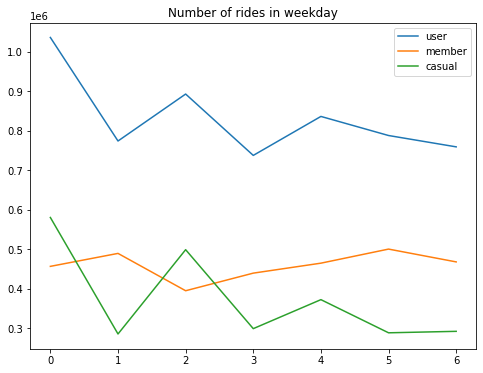

In [91]:
#plot graph of weekday frequency
plt.figure(figsize= (8,6))
plt.plot(case_1.groupby('week_day')['ride_id'].count().values)
plt.plot( case_1[case_1['member_casual']=='member'].groupby('week_day')['ride_id'].count().values)
plt.plot(case_1[case_1['member_casual']=='casual'].groupby('week_day')['ride_id'].count().values )
plt.title('Number of rides in weekday')
plt.legend(['user', 'member', 'casual'])
labels = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
# plt.xticks(case_1[case_1['member_casual']=='casual'].groupby('week_day')['ride_id'].count().index, labels)
plt.show()

<h2>Number of users<h2>

In [ ]:
member_type = pd.pivot_table(case_1, index='member_casual', values='ride_id',aggfunc='count')
member_type

,ride_id
member_casual,
casual,2613038
member,3210521


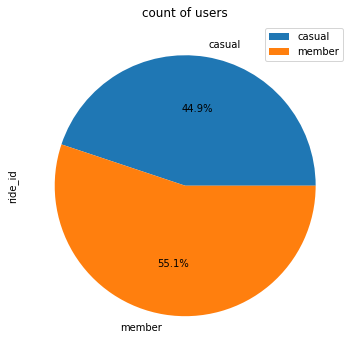

In [ ]:
member_type.plot.pie(y='ride_id',autopct='%1.1f%%', figsize=(8,6))
plt.title('count of users')
plt.legend()

In [ ]:
member_type_month = pd.pivot_table(case_1, index='month', columns='member_casual', values='ride_id',aggfunc='count')
member_type_month

member_casual,casual,member
month,,
1,18117,78717
2,10131,39491
3,168066,288926
4,136601,200629
5,256916,274717
6,370681,358914
7,442056,380354
8,412671,391681
9,363890,392257


([<matplotlib.axis.XTick at 0x1b3082a1c00>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

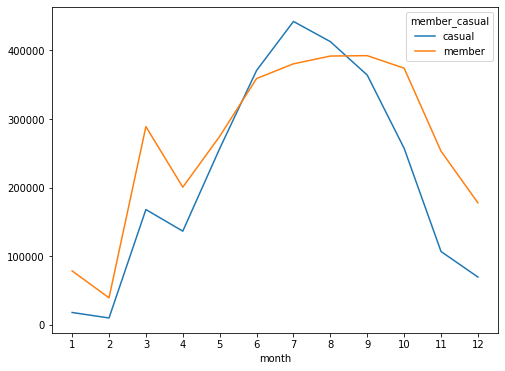

In [ ]:
member_type_month.plot(figsize =(8,6))
plt.xticks(member_type_month.index)

<h2>Types of bike<h2>

In [ ]:
# usage of bike type per month by member type
ride_type = pd.pivot_table(case_1, index= ['member_casual', 'month', 'rideable_type'], aggfunc={'rideable_type':np.size})
ride_type= ride_type.rename(columns={'rideable_type':'total_bike'})
ride_type = ride_type.reset_index()
ride_type

,member_casual,month,rideable_type,total_bike
0,casual,1,classic_bike,8259
1,casual,1,docked_bike,2105
2,casual,1,electric_bike,7753
3,casual,2,classic_bike,5695
4,casual,2,docked_bike,1271
...,...,...,...,...
56,member,10,electric_bike,163434
57,member,11,classic_bike,122173
58,member,11,electric_bike,130876
59,member,12,classic_bike,80829


C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


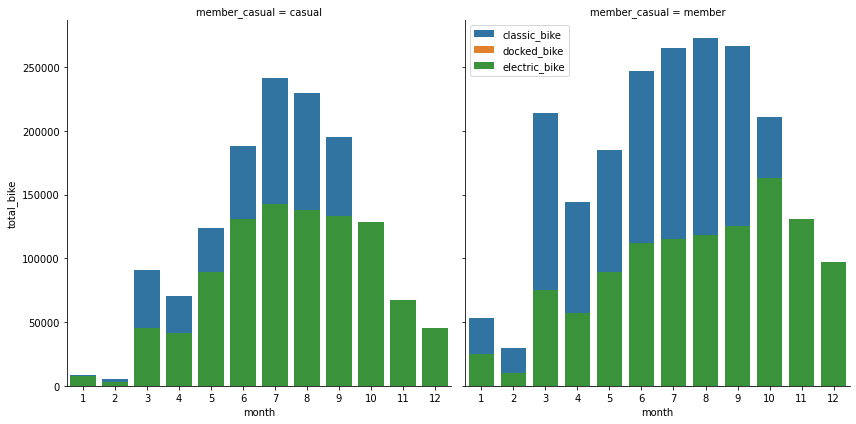

In [ ]:
g= sns.FacetGrid(ride_type, col='member_casual', hue='rideable_type', height=6)
g.map(sns.barplot, 'month','total_bike')
plt.legend()
plt.show()

In [ ]:
ride_type_month = case_1[['ride_id','month', 'member_casual', 'rideable_type']]
ride_type_month

,ride_id,month,member_casual,rideable_type
3100833,A3F8D895163BBB49,1,member,electric_bike
3317955,0D139A3203274B87,1,member,classic_bike
1635171,C7AE8E9CDB197A8E,1,member,classic_bike
1377821,2633EB2B8A99F5CB,1,member,electric_bike
1377691,3097EF26414C7016,1,member,classic_bike
...,...,...,...,...
5645240,7B3D0E8AB0842D5E,12,casual,classic_bike
5645241,B5AEBEF3B5F41C77,12,casual,electric_bike
5592951,CE1BE016BCE85CCB,12,casual,electric_bike
5698684,B0466FF51982DE4B,12,member,electric_bike


In [ ]:
# usage of bike type per day by member type
ride_type_day = pd.pivot_table(case_1, index= ['member_casual', 'week_day', 'rideable_type'], aggfunc={'rideable_type':np.size})
ride_type_day= ride_type_day.rename(columns={'rideable_type':'total_bike'})
ride_type_day = ride_type_day.reset_index()
ride_type_day.head()

,member_casual,week_day,rideable_type,total_bike
0,casual,0,classic_bike,142278
1,casual,0,docked_bike,38814
2,casual,0,electric_bike,117274
3,casual,1,classic_bike,131504
4,casual,1,docked_bike,31464


C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


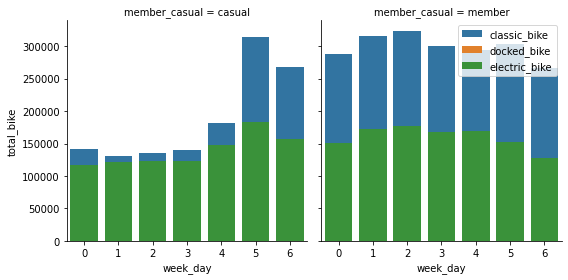

In [ ]:
g= sns.FacetGrid(ride_type_day, col='member_casual', hue='rideable_type', height=4)
g.map(sns.barplot, 'week_day','total_bike')
plt.legend()
plt.show()

<h2>Trip length<h2>

In [ ]:
# dict1={0:'Sunday', 1: 'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday',5:'Friday', 6:'Saturday'}
# case_1['week_day'] = case_1['week_day'].apply(lambda y:dict1[y])
weekly_usage = pd.pivot_table(case_1, index=['member_casual', 'week_day'],
                              aggfunc={'member_casual':np.size, 'ride_length':np.mean}
                              ).rename(columns={'member_casual':'total_trips','ride_length':'avg_trip_length'}).reset_index()
weekly_usage                    

,member_casual,week_day,total_trips,avg_trip_length
0,casual,Friday,580090,34.995022
1,casual,Monday,284855,28.267254
2,casual,Saturday,498485,37.693197
3,casual,Sunday,298366,32.367896
4,casual,Thursday,371857,30.324082
5,casual,Tuesday,287833,27.690464
6,casual,Wednesday,291552,27.752829
7,member,Friday,456209,15.295315
8,member,Monday,489050,12.821334
9,member,Saturday,394427,15.677598


C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:670: UserWarning:

Using the barplot function without specifying `order` is likely to produce an incorrect plot.



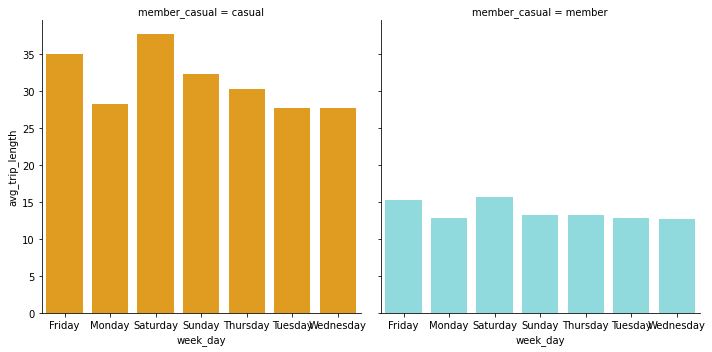

In [ ]:
g = sns.FacetGrid(weekly_usage, col='member_casual', hue='member_casual', palette=['orange', '#83e6ea'], height=5)
#g.set_xticklabels(rotation=45)
g.map(sns.barplot, 'week_day', 'avg_trip_length')
plt.show()

In [ ]:
monthly_usage = pd.pivot_table(case_1, index=['member_casual', 'month'],
                              aggfunc={'member_casual':np.size, 'ride_length':np.mean}
                              ).rename(columns={'member_casual':'total_trips','ride_length':'avg_trip_length'}).reset_index()
monthly_usage.head()

,member_casual,month,total_trips,avg_trip_length
0,casual,1,18117,25.684590
1,casual,2,10131,49.373229
2,casual,3,168066,38.158731
3,casual,4,136601,38.022990
4,casual,5,256916,38.230966


C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:670: UserWarning:

Using the barplot function without specifying `order` is likely to produce an incorrect plot.



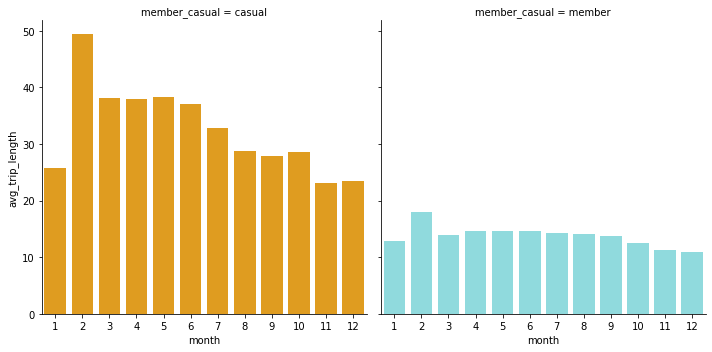

In [ ]:
g2 = sns.FacetGrid(monthly_usage, col='member_casual', hue='member_casual', palette=['orange', '#83e6ea'], height=5)
#g.set_xticklabels(rotation=45)
g2.map(sns.barplot, 'month', 'avg_trip_length')
plt.show()

<h2> Geolocation <h2>

In [ ]:
start_station = pd.pivot_table(case_1, index=['start_station_name', 'start_lat', 'start_lng',], aggfunc={'start_station_name':np.size})
start_station= start_station.rename(columns={'start_station_name':'num_trip'})
start_station = start_station.reset_index()
start_station

,start_station_name,start_lat,start_lng,num_trip
0,2112 W Peterson Ave,41.991062,-87.683560,2
1,2112 W Peterson Ave,41.991067,-87.683616,1
2,2112 W Peterson Ave,41.991082,-87.683676,1
3,2112 W Peterson Ave,41.991082,-87.683605,1
4,2112 W Peterson Ave,41.991095,-87.683559,1
...,...,...,...,...
1321380,Yates Blvd & 93rd St,41.726189,-87.566373,1
1321381,Yates Blvd & 93rd St,41.726202,-87.566294,1
1321382,Yates Blvd & 93rd St,41.726203,-87.566301,1
1321383,Yates Blvd & 93rd St,41.726206,-87.566314,1


In [ ]:
#Top 5 start station used by users
start_station_top5 = start_station.sort_values(by=['num_trip'], ascending=False).head(5)
start_station_top5

,start_station_name,start_lat,start_lng,num_trip
1148006,Streeter Dr & Grand Ave,41.892278,-87.612043,70929
1158533,Theater on the Lake,41.926277,-87.630834,32926
1217855,Wells St & Concord Ln,41.912133,-87.634656,32799
228979,Clark St & Elm St,41.902973,-87.631280,32183
813038,Michigan Ave & Oak St,41.900960,-87.623777,29640


In [ ]:
#Geolocation Top 5 start station used by users
import plotly_express as px
mapbox_access_token = 'pk.eyJ1IjoiaGFtaWJvIiwiYSI6ImNrN2N2Ym5uYTAybzEzb256cmk2NGtjeTUifQ.3qaqDjFrZdS3sqeoPeJG-w'
px.set_mapbox_access_token(mapbox_access_token)
fig = px.scatter_mapbox(start_station_top5, color='num_trip', color_continuous_scale=px.colors.sequential.matter,
    lat ='start_lat', lon= 'start_lng', size ='num_trip', zoom=11, opacity=0.5, text='start_station_name', 
    hover_name="start_station_name", hover_data=["start_station_name", "num_trip"])
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

# ![title](top5startstation.png)

In [ ]:
#Top 5 start station used by members
mem_start_station = pd.pivot_table(case_1[case_1.member_casual=='member'], index=['start_station_name', 'start_lat', 'start_lng','member_casual'], aggfunc={'start_station_name':np.size})
mem_start_station= mem_start_station.rename(columns={'start_station_name':'num_trip'})
mem_start_station = mem_start_station.reset_index()
mem_start_station

,start_station_name,start_lat,start_lng,member_casual,num_trip
0,2112 W Peterson Ave,41.991062,-87.683560,member,2
1,2112 W Peterson Ave,41.991082,-87.683676,member,1
2,2112 W Peterson Ave,41.991082,-87.683605,member,1
3,2112 W Peterson Ave,41.991097,-87.683590,member,1
4,2112 W Peterson Ave,41.991105,-87.683563,member,1
...,...,...,...,...,...
701194,Yates Blvd & 93rd St,41.726187,-87.566353,member,1
701195,Yates Blvd & 93rd St,41.726189,-87.566373,member,1
701196,Yates Blvd & 93rd St,41.726202,-87.566294,member,1
701197,Yates Blvd & 93rd St,41.726203,-87.566301,member,1


In [ ]:
mem_start_station_top5 = mem_start_station.sort_values(by=['num_trip'], ascending=False).head(5)
mem_start_station_top5

,start_station_name,start_lat,start_lng,member_casual,num_trip
122297,Clark St & Elm St,41.902973,-87.631280,member,20151
643922,Wells St & Concord Ln,41.912133,-87.634656,member,18230
344270,Kingsbury St & Kinzie St,41.889177,-87.638506,member,17988
648916,Wells St & Elm St,41.903222,-87.634324,member,16467
37195,Broadway & Barry Ave,41.937582,-87.644098,member,14730


In [ ]:
#Top 5 start station used by casual users
cas_start_station = pd.pivot_table(case_1[case_1.member_casual=='casual'], index=['start_station_name', 'start_lat', 'start_lng','member_casual'], aggfunc={'start_station_name':np.size})
cas_start_station= cas_start_station.rename(columns={'start_station_name':'num_trip'})
cas_start_station = cas_start_station.reset_index()
cas_start_station

,start_station_name,start_lat,start_lng,member_casual,num_trip
0,2112 W Peterson Ave,41.991067,-87.683616,casual,1
1,2112 W Peterson Ave,41.991095,-87.683559,casual,1
2,2112 W Peterson Ave,41.991099,-87.683629,casual,1
3,2112 W Peterson Ave,41.991102,-87.683617,casual,1
4,2112 W Peterson Ave,41.991104,-87.683552,casual,1
...,...,...,...,...,...
621859,Yates Blvd & 93rd St,41.726177,-87.566430,casual,1
621860,Yates Blvd & 93rd St,41.726179,-87.566377,casual,1
621861,Yates Blvd & 93rd St,41.726184,-87.566331,casual,1
621862,Yates Blvd & 93rd St,41.726188,-87.566380,casual,1


In [ ]:
cas_start_station_top5 = cas_start_station.sort_values(by=['num_trip'], ascending=False).head(5)
cas_start_station_top5

,start_station_name,start_lat,start_lng,member_casual,num_trip
541156,Streeter Dr & Grand Ave,41.892278,-87.612043,casual,56933
548318,Theater on the Lake,41.926277,-87.630834,casual,18526
309103,Lake Shore Dr & Monroe St,41.880958,-87.616743,casual,18401
390842,Millennium Park,41.881032,-87.624084,casual,18205
378095,Michigan Ave & Oak St,41.900960,-87.623777,casual,17700


In [ ]:
start_geo = pd.concat([mem_start_station_top5, cas_start_station_top5])
start_geo

,start_station_name,start_lat,start_lng,member_casual,num_trip
122297,Clark St & Elm St,41.902973,-87.631280,member,20151
643922,Wells St & Concord Ln,41.912133,-87.634656,member,18230
344270,Kingsbury St & Kinzie St,41.889177,-87.638506,member,17988
648916,Wells St & Elm St,41.903222,-87.634324,member,16467
37195,Broadway & Barry Ave,41.937582,-87.644098,member,14730
541156,Streeter Dr & Grand Ave,41.892278,-87.612043,casual,56933
548318,Theater on the Lake,41.926277,-87.630834,casual,18526
309103,Lake Shore Dr & Monroe St,41.880958,-87.616743,casual,18401
390842,Millennium Park,41.881032,-87.624084,casual,18205
378095,Michigan Ave & Oak St,41.900960,-87.623777,casual,17700


In [ ]:
#Geolocation Top 5 start station used by members
mapbox_access_token = 'pk.eyJ1IjoiaGFtaWJvIiwiYSI6ImNrN2N2Ym5uYTAybzEzb256cmk2NGtjeTUifQ.3qaqDjFrZdS3sqeoPeJG-w'
px.set_mapbox_access_token(mapbox_access_token)
fig1= px.scatter_mapbox(mem_start_station_top5, color='num_trip', 
                    color_continuous_scale=px.colors.sequential.matter,
                    lat ='start_lat', lon= 'start_lng', size ='num_trip',
                    zoom=11.5, opacity=0.5, text='start_station_name')
fig1.update_layout(margin={"r":0,"t":0,"l":0,"b":0}, height=500, width=600)
fig1.show()

# ![title](top5memstation.png)

In [ ]:
#Geolocation Top 5 start station used by casual users
mapbox_access_token = 'pk.eyJ1IjoiaGFtaWJvIiwiYSI6ImNrN2N2Ym5uYTAybzEzb256cmk2NGtjeTUifQ.3qaqDjFrZdS3sqeoPeJG-w'
px.set_mapbox_access_token(mapbox_access_token)
fig2= (px.scatter_mapbox(cas_start_station_top5, color='num_trip',
                        color_continuous_scale=px.colors.sequential.matter,
                        lat ='start_lat', lon= 'start_lng', size ='num_trip',
                        zoom=12, opacity=0.5, text='start_station_name'))

fig2.update_layout(margin={"r":0,"t":0,"l":0,"b":0},height=500, width=600)
fig2.show()

# ![title](top5casualstation.png)

Act:
1. Casual riders tend to use the service more during the weekends, therefore maybe a promotion through Facebook, Google, Tiktok,... to attract them to use service more on weekdays would be reasonable.
2. Casual riders are likely to ride more in summer and autumn time so the promotion during this time would be more effective.
3. Top 5 start stations used by casual riders are all riverside, advertisements along river would appeal the riders.
4. Docked and electric bikes are the most common bike types to casual riders. It is more productive to focus on these types of transport. 
